In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

n_obs = 180  # ~6 months of daily data
mu = 0
sigma = 0.05

# 5 uncorrelated series
uncorrelated_data = np.random.normal(mu, sigma, size=(n_obs, 5))
uncorrelated_df = pd.DataFrame(uncorrelated_data, columns=[f"Y{i+1}" for i in range(5)])

In [2]:
# Using correlation matrix
pca = PCA()
pca.fit(uncorrelated_df)
explained_variance = pca.explained_variance_ratio_

In the case of the uncorrelated synthetic Gaussian variables, the PCA reveals a near-uniform distribution of explained variance across all five components. This outcome is expected because the original variables are uncorrelated and equally scaled. As a result, Component 1 typically explains about 20% of the total variance, similar to Components 2 through 5. No single principal component dominates, because there's no shared structure or common signal to extract. This behavior confirms the orthogonality and statistical independence of the inputs.

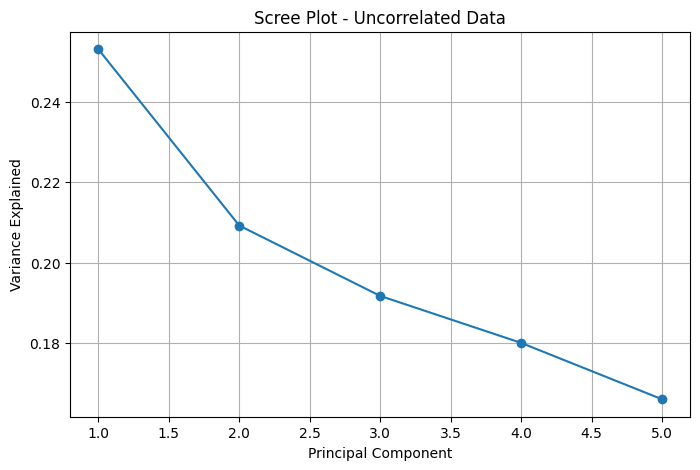

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), explained_variance, marker='o', linestyle='-')
plt.title("Scree Plot - Uncorrelated Data")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

In [13]:
import yfinance as yf
import pandas as pd

tickers = ['^IRX', '^FVX', '^TNX', '^TYX']  # 13-week, 5y, 10y, 30y Treasury equivalents
data = yf.download(tickers, start='2024-12-15', end='2025-06-15')['Close']
print("Columns after download:", data.columns) # Inspect columns after download

# f. Compute daily yield changes using original column names
yield_changes = data.pct_change().dropna()

# Rename columns of the yield_changes DataFrame
yield_changes = yield_changes.rename(columns={'^IRX': '3M', '^FVX': '5Y', '^TNX': '10Y', '^TYX': '30Y'})

print("\nYield changes DataFrame head after rename:")
display(yield_changes.head())
print("\nYield changes DataFrame info after rename:")
yield_changes.info()

/tmp/ipython-input-13-914634172.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2024-12-15', end='2025-06-15')['Close']
[*********************100%***********************]  4 of 4 completed

Columns after download: Index(['^FVX', '^IRX', '^TNX', '^TYX'], dtype='object', name='Ticker')

Yield changes DataFrame head after rename:


Ticker,5Y,3M,10Y,30Y
Date,,,,
2024-12-17,-0.001410,0.002838,-0.002729,-0.006293
2024-12-18,0.031073,-0.001887,0.024857,0.017471
2024-12-19,0.010274,-0.002836,0.016911,0.017386
2024-12-20,-0.010170,-0.001185,-0.010066,-0.005063
2024-12-23,0.014840,0.000000,0.016578,0.014419



Yield changes DataFrame info after rename:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2024-12-17 to 2025-06-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   5Y      122 non-null    float64
 1   3M      122 non-null    float64
 2   10Y     122 non-null    float64
 3   30Y     122 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
pca_real = PCA()
pca_real.fit(yield_changes)
explained_real = pca_real.explained_variance_ratio_

In the government yield data, PCA exposes a dominant structure. Component 1 often explains ~80–95% of total variance—capturing the common movement across all yields (i.e., parallel shifts in the yield curve). Component 2 might explain another 3–10%, typically associated with slope or twist effects. Component 3 and beyond contribute diminishing marginal insight. This pattern reflects how monetary policy, inflation expectations, and macro shifts affect yields systematically across maturities.

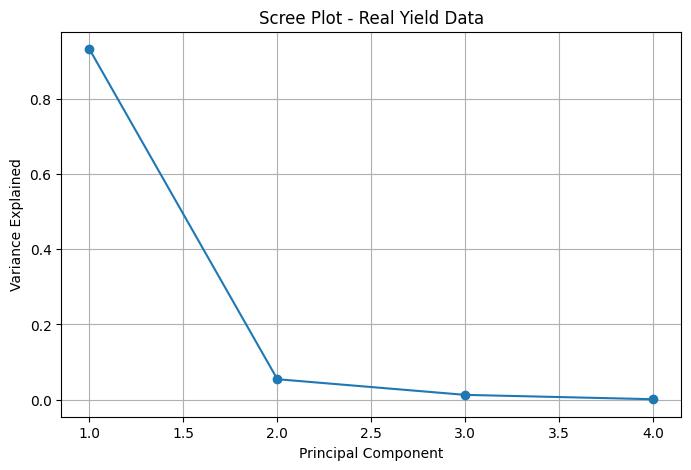

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_real)+1), explained_real, marker='o', linestyle='-')
plt.title("Scree Plot - Real Yield Data")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid(True)
plt.show()

In the uncorrelated dataset, the screeplot is flat—no component explains significantly more variance than another. That’s synthetic white noise.
In contrast, the screeplot from real government yield changes shows a sharp elbow after the first principal component. This tells you there's a strong common driver (likely the level of interest rates), and smaller secondary drivers (like slope/twist).
This comparison illustrates how PCA reveals hidden structure in financial systems. When you see a big drop-off in explained variance after PC1, you know there's signal.
